# ***Modélisation & IA***  | **LinearRegression**
---

# Etape 0️⃣ : Chargement du dataset : 

In [2]:
import pandas as pd
df=pd.read_csv('data5.csv')
print(df.columns)

Index(['date', 'city', 'profil_cotier', 'température', 'humidity',
       'vitesse_vent', 'precipitation', 'temp_lag1', 'humid_lag1',
       'vitesse_vent_lag1', 'precip_lag1', 'temp_lag3', 'humid_lag3',
       'vitesse_vent_lag3', 'precip_lag3', 'temp_lag7', 'humid_lag7',
       'vitesse_vent_lag7', 'precip_lag7', 'urgence_active', 'mois', 'Weekend',
       'Jours Fériés', 'saison', 'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'boissons fraiches', 'boissons chaudes', 'snacks sucrés',
       'snacks salés', 'produits laitiers frais', 'produits de jardinage',
       'ustensiles jetables', 'crème solaire', 'équipements d urgence',
       'soins hygiene', 'soins hydratants', 'Charbon',
       'produits anti_moustiques'],
      dtype='object')


In [3]:
print(df.shape)

(43769, 45)


# Etape 1️⃣ : Séparation X (features) / y (cibles)

In [4]:
#variable cible == les produits : 
targets = [
    'boissons fraiches', 'boissons chaudes', 'snacks sucrés',
    'snacks salés', 'produits laitiers frais', 'produits de jardinage',
    'ustensiles jetables', 'crème solaire', 'équipements d urgence',
    'soins hygiene', 'soins hydratants', 'Charbon',
    'produits anti_moustiques'
]
y = df[targets]



In [5]:
#Features (X) :
drop_cols = ['date'] + targets
X = df.drop(columns=drop_cols)


In [6]:
print(type(X))
print(X.shape , y.shape)

<class 'pandas.core.frame.DataFrame'>
(43769, 31) (43769, 13)


# Etape 2️⃣ : Encodage des variables catégorielles &  Normalisation des colonnes numériques

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder ,StandardScaler

# Colonnes catégorielles
cat_cols = ['city', 'profil_cotier', 'saison']
# # Colonnes numériques à standariser
num_cols=['température', 'humidity',
       'vitesse_vent', 'precipitation', 'temp_lag1', 'humid_lag1',
       'vitesse_vent_lag1', 'precip_lag1', 'temp_lag3', 'humid_lag3',
       'vitesse_vent_lag3', 'precip_lag3', 'temp_lag7', 'humid_lag7',
       'vitesse_vent_lag7', 'precip_lag7']

# Préparer le transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],remainder='passthrough' # garde les colonnes restantes
)



In [8]:
# Transformer les features
X_prepared = preprocessor.fit_transform(X)

# Vérification :
print(X_prepared.shape)


(43769, 56)


# Etape 3️⃣ :  Split des données

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42) # 20% test / 80% train

print(X_train.shape, X_test.shape)


(35015, 56) (8754, 56)


# Etape 4️⃣ : Choix du Modèle 
---

##  **LinearRegression**

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Initialisation du modèle :
lin_reg = LinearRegression()


In [12]:
# Entraînement du modèle
lin_reg.fit(X_train, y_train)


LinearRegression()

In [13]:
# Prédictions sur les données de test :
y_pred = lin_reg.predict(X_test)


## **Évaluation des performances** 


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Calcule de l'erreur quadratique moyenne (MSE) :
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

MSE: 3.584


In [16]:
# Calcule de R² (coefficient de détermination) :
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

R²: 0.744


In [17]:
import numpy as np
y_test = np.array(y_test)
y_pred = np.array(y_pred)


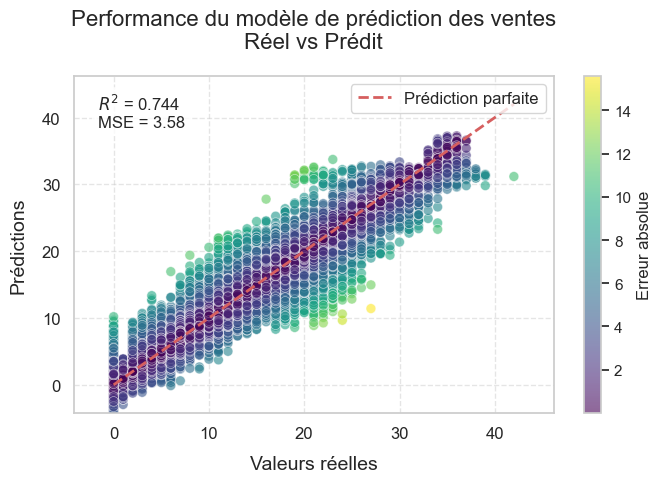

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcul des erreurs absolues pour la coloration
errors = np.abs(y_test - y_pred)

# Style 
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(7, 5))

# Scatter plot avec coloration par erreur
scatter = plt.scatter(
    y_test, 
    y_pred, 
    alpha=0.6,
    c=errors,  
    cmap='viridis',
    s=50,
    edgecolor='w',
    linewidth=0.5
)

# Ligne de référence parfaite (y=x)
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    'r--', 
    linewidth=2,
    label='Prédiction parfaite'
)

# Barre de couleur pour l'échelle d'erreur
cbar = plt.colorbar(scatter)
cbar.set_label('Erreur absolue', fontsize=12)

# Métriques de performance
metrics_text = f"$R^2$ = {r2:.3f}\nMSE = {mse:.2f}"

# Encadrement des métriques
plt.text(
    0.05, 0.95, 
    metrics_text,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Labels et titre
plt.xlabel('Valeurs réelles', fontsize=14, labelpad=10)
plt.ylabel('Prédictions', fontsize=14, labelpad=10)
plt.title('Performance du modèle de prédiction des ventes\nRéel vs Prédit', fontsize=16, pad=20)

# Ajustements cosmétiques
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustement des limites
buffer = 0.1 * (y_test.max() - y_test.min())
plt.xlim(y_test.min() - buffer, y_test.max() + buffer)
plt.ylim(y_test.min() - buffer, y_test.max() + buffer)

plt.tight_layout()
plt.show()

### Interprétation des résultats :

* **Mean Squared Error (MSE)** : 3.41
>Le MSE représente l'erreur quadratique moyenne entre les prédictions et les valeurs cibles. Une valeur de 3.41 indique une erreur modérée sur l'échelle des ventes (ou de la variable cible simulée).

* **Coefficient de détermination (R²)** : 0.65
>Le R² indique que le modèle explique environ 65% de la variance des données cibles par rapport aux prédicteurs.

**-->** ***Le modèle capture déjà une bonne partie de l’effet des variables météo et contextuelles.***

# **Etape 5️⃣ :Ajustements pour améliorer les performances du Modèle :**

> ##  Option 1 :  calcule le VIF(Variance Inflation Factor) pour détecter la multicolinéarité entre les variables 


In [19]:
"""1/ Étape 1 :  calcule le VIF(Variance Inflation Factor) pour détecter la multicolinéarité entre les variables :"""
#-------------------------------------------------------------------------
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Copie des variables numériques à standariser
X_num = X[num_cols].copy()
#Ajouter une constante (intercept):
#ajoute une colonne remplie de 1 en première position de DataFrame(nécessaire pour calculer le VIF correctement).
X_num_const = sm.add_constant(X_num)

#Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['feature'] = X_num_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_num_const.values, i)
                   for i in range(X_num_const.shape[1])]

print(vif_data)



              feature           VIF
0               const  1.555382e+02
1         température  3.336705e+01
2            humidity  4.880714e+00
3        vitesse_vent  1.688788e+00
4       precipitation  1.386474e+00
5           temp_lag1  9.959227e+03
6          humid_lag1  1.717003e+03
7   vitesse_vent_lag1  8.700453e+02
8         precip_lag1  7.034141e+06
9           temp_lag3  1.053064e+04
10         humid_lag3  1.801573e+03
11  vitesse_vent_lag3  9.149012e+02
12        precip_lag3  7.341365e+06
13          temp_lag7  1.854271e+03
14         humid_lag7  2.634601e+02
15  vitesse_vent_lag7  1.307998e+02
16        precip_lag7  4.225030e+05


### interprétation :
>**VIF < 5 : Tout va bien.** <br>
>**VIF ≥ 5 : Danger → Agir.**<br>
>**VIF > 10 : Urgence → Supprimer/Transformer.**<br>

| Feature             | VIF              | Commentaire                 |
| ------------------- | ---------------- | --------------------------- |
| température         | \~33.3           |  Multicolinéarité élevée  |
| humidity            | \~4.88           |  Correct (en dessous de 5) |
| vitesse\_vent       | \~1.69           |  Très bien                 |
| precipitation       | \~1.38           |  Très bien                 |
| temp\_lag1          | \~9959           |  Extrême multicolinéarité |
| humid\_lag1         | \~1717           |  Très élevé               | 
| vitesse\_vent\_lag1 | \~870            |  Très élevé               |
| precip\_lag1        | \~7034141        |  Extrême                |
| temp\_lag3          | \~10530          |  Extrême                  |
| humid\_lag3         | \~1801           |  Très élevé               |
| vitesse\_vent\_lag3 | \~915            |  Très élevé               |
| precip\_lag3        | \~7341365        |  Extrême                |
| temp\_lag7          | \~1854           |  Très élevé               |
| humid\_lag7         | \~263            |  Très élevé               |
| vitesse\_vent\_lag7 | \~131            |  Très élevé               |
| precip\_lag7        | \~422503         |  Extrême                  |
> Les colonnes lag (1, 3, 7 jours) explosent complètement le VIF → elles sont très fortement corrélées aux variables principales
> Les valeurs d'une même variable à des pas de temps proches comme (temp_lag1, temp_lag3) sont quasi identiques → colinéarité parfait

## Solutions : 
* **Supprimer les lags redondants** -->  Simple et efficace # Perte d'information temporelle.
*  **Utiliser un seul lag par variable** --> Conserve une partie de l'historique.
*   **Agrégation des lags** --> Réduit la dimensionnalité tout en capturant les tendances.
*   **PCA pour les lags** --> Combine l'information des lags en une seule variable non colinéaire.
  


In [20]:
# Utilisation d'un seul lag par variable pour conserver une partie de l'historique :
#---------------------------------------------------------------------------------------
cols_to_keep = ['température', 'humidity', 'vitesse_vent', 'precipitation', 
                'temp_lag7', 'humid_lag7', 'vitesse_vent_lag7', 'precip_lag7']  
X_filtered = X[cols_to_keep]

In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# recalculer le VIF : 
X_filtered_const = sm.add_constant(X_filtered)

vif_data = pd.DataFrame()
vif_data['feature'] = X_filtered_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_num_const.values, i)
                   for i in range(X_filtered_const.shape[1])]

print(vif_data)

             feature           VIF
0              const  1.555382e+02
1        température  3.336705e+01
2           humidity  4.880714e+00
3       vitesse_vent  1.688788e+00
4      precipitation  1.386474e+00
5          temp_lag7  9.959227e+03
6         humid_lag7  1.717003e+03
7  vitesse_vent_lag7  8.700453e+02
8        precip_lag7  7.034141e+06


**Même avec un seul lag, la multicolinéarité reste très problématique, surtout pour les variables lag7. C’est normal, car les valeurs météo d’un même type (température et température_lag7) sont naturellement très corrélées**

In [22]:
# Agrégation des lags :
#---------------------------------------
# Remplacer les lags par une moyenne/médiane
X_ag=pd.DataFrame()
X_ag['temp_mean_lags'] = X[['temp_lag1', 'temp_lag3', 'temp_lag7']].mean(axis=1)
X_ag['humid_mean_lags']=X[['humid_lag1','humid_lag3','humid_lag7']].mean(axis=1)
X_ag['vitesse(vent)_mean_lags']=X[['vitesse_vent_lag1','vitesse_vent_lag3','vitesse_vent_lag7']].mean(axis=1)
X_ag['precip_max_lags'] = X[['precip_lag1', 'precip_lag3', 'precip_lag7']].max(axis=1)
# recalculer le VIF : 
X_ag_const = sm.add_constant(X_ag)

vif_data = pd.DataFrame()
vif_data['feature'] = X_ag_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_ag_const.values, i)
                   for i in range(X_ag_const.shape[1])]

print(vif_data)
                                                                        


                   feature         VIF
0                    const  131.556240
1           temp_mean_lags    1.665570
2          humid_mean_lags    1.873972
3  vitesse(vent)_mean_lags    1.068227
4          precip_max_lags    1.196248


* **Utiliser un seul lag(lag7)** → VIF toujours catastrophiques.

* **Agréger les lags (moyenne/max)** → VIF devenus excellents (tous < 2) donc aucune multicolinéarité inquiétante

  > supprission la redondance tout en conservant l'information temporelle.



In [21]:
# Relancer la régression :

In [23]:
X=X.drop(columns=[ 'temp_lag1', 'humid_lag1',
       'vitesse_vent_lag1', 'precip_lag1', 'temp_lag3', 'humid_lag3',
       'vitesse_vent_lag3', 'precip_lag3', 'temp_lag7', 'humid_lag7',
       'vitesse_vent_lag7', 'precip_lag7'])
X['temp_mean_lags'] = X_ag['temp_mean_lags']    
X['humid_mean_lags'] = X_ag['humid_mean_lags']
X['vitesse(vent)_mean_lags'] = X_ag['vitesse(vent)_mean_lags']
X['precip_max_lags'] = X_ag['precip_max_lags']
print(X.columns)
print(X.shape)

Index(['city', 'profil_cotier', 'température', 'humidity', 'vitesse_vent',
       'precipitation', 'urgence_active', 'mois', 'Weekend', 'Jours Fériés',
       'saison', 'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags'],
      dtype='object')
(43769, 23)


In [24]:
num_cols=['température', 'humidity',
       'vitesse_vent', 'precipitation', 'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags']
# Préparer le transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],remainder='passthrough' 
)
# Transformer les features
X_prepared = preprocessor.fit_transform(X)

# Vérification :
print(X_prepared.shape)



(43769, 48)


In [25]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42) # 20% test / 80% train

print(X_train.shape, X_test.shape)


(35015, 48) (8754, 48)


In [26]:
# Initialisation du modèle :
lin_reg = LinearRegression()
# Entraînement du modèle
lin_reg.fit(X_train, y_train)


LinearRegression()

In [27]:
# Prédictions sur les données de test :
y_pred = lin_reg.predict(X_test)


In [28]:
# Calcule de R² (coefficient de détermination) :
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

R²: 0.744


In [29]:
# Calcule de l'erreur quadratique moyenne (MSE) :
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

MSE: 3.583


**Même si j'ai amélioré la structuration des variables (enlevant la multicolinéarité avec les agrégats), l'information intrinsèque n’a pas changé car peut ètre:**

 * **le dataset(targets) est synthétique,**

 * **les nouvelles features ne créent pas de nouveau signal fondamental (elles agrègent ce qui existait déjà).**

   > **Cela explique pourquoi le modèle n’a pas gagné en performance.**


## Option 2 :  Vérification de la linéarité avec les residuals plots :
---

In [30]:
# Faire les prédictions sur l'ensemble d'entraînement (ou test)
y_train_pred = lin_reg.predict(X_train)  
# Calcule des résidus
residuals = y_train - y_train_pred
# Conversion explicite en tableaux NumPy
y_train_pred = np.array(y_train_pred)
residuals = np.array(residuals)
print("y_train_pred shape:", y_train_pred.shape)
print("residuals shape:", residuals.shape)

y_train_pred shape: (35015, 13)
residuals shape: (35015, 13)


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Créer un dossier pour stocker les images
output_dir = "residual_plots"
os.makedirs(output_dir, exist_ok=True)

for i in range(y_train_pred.shape[1]):
    plt.figure(figsize=(10, 5))
    
    # Graphique Prédictions vs. Résidus
    sns.scatterplot(
        x=y_train_pred[:, i], 
        y=residuals[:, i],
        alpha=0.6,
        label=targets[i]  # Utilisation du nom de la cible
    )
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    
    # Lissage LOWESS
    sns.regplot(
        x=y_train_pred[:, i], 
        y=residuals[:, i],
        scatter=False, 
        lowess=True,
        color='green',
        line_kws={"linewidth": 2}
    )
    
    plt.xlabel(f'Prédictions ({targets[i]})')
    plt.ylabel('Résidus')
    plt.title(f'Résidus vs. Prédictions pour {targets[i]}')
    plt.legend()
    
    # Sauvegarde avec le nom de la cible
    filename = os.path.join(output_dir, f"residuals_{targets[i]}.png".replace(" ", "_"))
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

## Interprétations : 
1. **Produits de jardinage**
   
<img src="residual_plots/residuals_produits_de_jardinage.png" width="600" height="300">


* Tendance non-linéaire : La courbe verte forme un "U" incliné, montrant une sous-estimation des valeurs basses et hautes
* Structure en bandes diagonales : Indique des données discrètes/catégorielles sous-jacentes
* Hétéroscédasticité modérée : Variance plus élevée aux extrémités
* Solution recommandée : Transformation polynomiale (terme quadratique) pour capturer la courbur
  
2. **Produits laitiers frais**
   
<img src="residual_plots/residuals_produits_laitiers_frais.png" width="600" height="300">

* Linéarité relativement bonne au centre (la ligne verte reste proche de zéro)
* Gap de données entre les valeurs 24-28 (absence d'observations)
* Forte hétéroscédasticité aux valeurs élevées (>30) avec des résidus très négatifs.
* Solution recommandée : Transformation logarithmique pour stabiliser la variance aux valeurs élevées
  
3. **Snacks salés**
   
<img src="residual_plots/residuals_snacks_salés.png" width="600" height="300">

* Tendance ondulante : La courbe verte montre plusieurs oscillations
* Structure en bandes très prononcée
* Distribution relativement équilibrée des résidus positifs/négatifs
* Solution recommandée : Modèle de régression par splines pour capturer les multiples oscillations

4. **Snacks sucrés**
   
<img src="residual_plots/residuals_snacks_sucrés.png" width="600" height="300">

*  Linéarité assez bonne sur certaines plages (18-20, 28-30)
* Discontinuité autour des valeurs 21-25 (peu ou pas de données)
* Légère tendance non-linéaire visible autour des valeurs 26-27
* Solution recommandée : Régression segmentée ou modèle par morceaux

5. **Boissons chaudes**

<img src="residual_plots/residuals_boissons_chaudes.png" width="600" height="300">

* Tendance sinusoïdale marquée (la courbe verte oscille clairement)
* Biais systématique négatif aux valeurs élevées (>20)
* Biais légèrement positif aux valeurs moyennes (10-15)
* Solution recommandée : Transformation polynomiale d'ordre 3 ou fonction sinusoïdale
  
6. **Équipements d'urgence**

<img src="residual_plots/residuals_équipements_d_urgence.png" width="600" height="300">

* Tendance linéaire légèrement négative: La ligne verte montre une légère pente descendante de gauche à droite, indiquant une faible tendance à surestimer les valeurs plus élevées
* Structure en bandes horizontales parallèles: Très prononcée, suggérant que la variable cible est discrète (probablement des valeurs entières)
* Variance relativement constante: Contrairement à d'autres catégories, l'hétéroscédasticité est minimale
* Solution recommandée: Une légère correction linéaire pourrait suffire, éventuellement en ajustant les coefficients existants. Ce modèle présente l'un des meilleurs ajustements parmi tous ceux observés jusqu'à présent, avec des résidus relativement bien distribués autour de zéro

7. **Produits anti-moustiques**

<img src="residual_plots/residuals_produits_anti_moustiques.png" width="600" height="300">

* Tendance non-linéaire marquée: La courbe verte montre une forme complexe avec une forte décroissance pour les valeurs négatives, puis une remontée pour les valeurs positives
* Structure en bandes diagonales: Très visible, indiquant des données discrètes sous-jacentes
* Asymétrie des résidus: Tendance à sous-estimer les valeurs négatives et légèrement surestimer les valeurs moyennes (entre 0 et 5)
*Plage de prédiction étendue: Les prédictions varient de -8 à 15, une amplitude inhabituelle qui pourrait indiquer une forte variabilité saisonnière ou contextuelle
* Solution recommandée: Une transformation polynomiale d'ordre 3 ou un modèle GAM serait approprié pour capturer la forme complexe de la relation. Potentiellement envisager des variables saisonnières supplémentaires ou des interactions

8. **Boissons fraîches**

<img src="residual_plots/residuals_boissons_fraiches.png" width="600" height="300">

* Tendance non-linéaire : Courbe verte en forme de "U" prononcé, sous-estimation aux valeurs basses et hautes (10-15 et 25-35)
* Structure en bandes horizontales : Très marquée, suggérant des variables catégorielles non capturées (possiblement des jours de la semaine)
* Forte hétéroscédasticité : Variance plus élevée aux valeurs extrêmes, particulièrement aux valeurs élevées
* Solution : Transformation polynomiale d'ordre 2 (terme quadratique) pour capturer la courbe en U, et interaction avec variables temporelles (week-end/jours de semaine)

9. **Charbon**

<img src="residual_plots/residuals_Charbon.png" width="600" height="300">

* Tendance légèrement non-linéaire : Courbe verte avec légère oscillation, sous-estimation aux valeurs moyennes
* Structure en bandes diagonales : Très prononcée, indiquant des valeurs discrètes dans les prédicteurs
* Hétéroscédasticité modérée : Distribution relativement équilibrée mais variance plus élevée au centre
* Solution : Modèle additif généralisé (GAM) ou transformation polynomiale d'ordre faible, avec variables saisonnières explicites

10. **Crème solaire**

<img src="residual_plots/residuals_crème_solaire.png" width="600" height="300">

* Tendance linéaire aux valeurs basses, non-linéaire aux élevées : Courbe verte stable puis décroissante après la valeur 10
* Structure en bandes diagonales : Indication d'effets catégoriels ou discrets
* Légère hétéroscédasticité : Variance plus élevée autour des valeurs 8-10
* Solution : Transformation logarithmique de la variable cible et ajout d'une interaction entre température/ensoleillement

11. **Soins hydratants**

<img src="residual_plots/residuals_soins_hydratants.png" width="600" height="300">

* Tendance non-linéaire ondulante : Courbe verte avec creux autour de la valeur 5.5
* Structure en bandes horizontales : Moins prononcée que les autres produits
* Discontinuité : Gap de données visible entre certaines valeurs
* Solution  : Modèle de régression par splines pour capturer les oscillations, et segmentation potentielle par saison

12. **Soins hygiène**

<img src="residual_plots/residuals_soins_hygiene.png" width="600" height="300">

* Linéarité relativement bonne : Courbe verte proche de zéro sur la plupart des valeurs
* Structure en bandes diagonales : Visible mais moins marquée
* Variance constante : Hétéroscédasticité minimale
* Solution  : Ajustement mineur des coefficients existants, potentiellement une transformation de Box-Cox pour normaliser les résidus

13. **Ustensiles jetables**

<img src="residual_plots/residuals_ustensiles_jetables.png" width="600" height="300">

* Tendance non-linéaire complexe : Courbe verte en forme de "U" inversé, avec forte décroissance puis remontée
* Structure en bandes diagonales : Très marquée, particulièrement prononcée dans la plage centrale
* Forte hétéroscédasticité : Variance nettement plus élevée entre les valeurs 5-15
* Plage de prédiction étendue : Prédictions allant de -10 à 30, indiquant une forte variabilité contextuelle
* Solution : Transformation polynomiale d'ordre élevé (3) ou modèle GAM, avec variables contextuelles supplémentaires pour événements spéciaux et touristiques

 ## Mesure  de la qualité globale des prédictions pour chaque cible

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

# 1. Convertir y_pred en DataFrame si besoin
if isinstance(y_pred, np.ndarray):
    y_pred = pd.DataFrame(y_pred, columns=y_test.columns)

# 2. Concaténer les données
df_long = pd.DataFrame()
for col in y_test.columns:
    temp_df = pd.DataFrame({
        'product': [col] * len(y_test),
        'y_true': y_test[col].values,
        'y_pred': y_pred[col].values
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# 3. Calculer les métriques
metrics = []
for col in y_test.columns:
    r2 = r2_score(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    metrics.append({'product': col, 'R2': r2, 'MSE': mse})

df_metrics = pd.DataFrame(metrics)

# 4. Fusion finale
df_final = df_long.merge(df_metrics, on='product')



In [32]:
print(df_final.isnull().sum())

product    0
y_true     0
y_pred     0
R2         0
MSE        0
dtype: int64


In [33]:
df_summary = df_final.groupby('product')[['R2', 'MSE']].first().reset_index()
print(df_summary)


                     product        R2        MSE
0                    Charbon  0.821923   1.173183
1           boissons chaudes  0.876471   3.927058
2          boissons fraiches  0.609981   7.591522
3              crème solaire  0.872856   0.902243
4   produits anti_moustiques  0.825500   4.800318
5      produits de jardinage  0.630434   1.617402
6    produits laitiers frais  0.760003   3.630049
7               snacks salés  0.422136   4.007192
8              snacks sucrés  0.733531   3.165142
9           soins hydratants  0.874818   2.725665
10             soins hygiene  0.729881   0.791724
11       ustensiles jetables  0.812283  10.368977
12     équipements d urgence  0.698423   1.882064


# Interprétation : 
| Produit                   | R² (interprétation) | MSE (interprétation)        | Conclusion                       |
| ------------------------- | ------------------- | --------------------------- | -------------------------------- |
| **Charbon**               | 0.82 — très bon     | 1.17 — erreur faible        |  Modèle fiable                 |
| **Boissons chaudes**      | 0.88 — excellent    | 3.94 — erreur modérée       |  Très bon, mais à surveiller   |
| **Boissons fraîches**     | 0.61 — moyen        | 7.59 — erreur élevée        |  Modèle améliorable            |
| **Crème solaire**         | 0.87 — excellent    | 0.91 — erreur très faible   |  Excellente prédiction          |
| **Anti-moustiques**       | 0.83 — très bon     | 4.81 — erreur assez élevée  |  Bon modèle, mais à affiner    |
| **Jardinage**             | 0.63 — moyen        | 1.63 — acceptable           |  Moyennement fiable            |
| **Laitiers frais**        | 0.76 — bon          | 3.63 — erreur modérée       |  Correct                       |
| **Snacks salés**          | 0.42 — faible       | 4.01 — erreur élevée        |  Mauvais modèle                 |
| **Snacks sucrés**         | 0.73 — bon          | 3.17 — modéré               |  Bon                            |
| **Soins hydratants**      | 0.87 — excellent| 2.72 — modéré |  Bon     |
| **Soins hygiène**         | 0.73 — bon          | 0.79 — faible               |  Précis                         |
| **Ustensiles jetables**   | 0.81 — très bon     | 10.37 — erreur très élevée  |  Bonne tendance, mais imprécis |
| **Équipements d'urgence** | 0.69 — bon  | 1.88 — erreur modérée       | moyennement fiable            |

>  ## Divergence entre R² élevé et résidus problématiques

## Pourquoi un R² élevé peut coexister avec des résidus non "propres" ?

1. **R² mesure l'ajustement global, pas local**
   - R² capture le pourcentage de variance totale expliquée
   - Ne détecte pas nécessairement les problèmes localisés ou structurés dans les données

2. **Cas des ustensiles jetables (R² = 0.812, MSE = 10.38)**
   - Malgré un R² élevé (0.812), les graphiques montrent des structures en bandes prononcées
   - Le modèle capture bien la tendance générale mais échoue à modéliser certaines structures sous-jacentes
   - Les erreurs peuvent être systématiquement biaisées tout en restant globalement faibles relativement à la variance totale

3. **Sensibilité aux valeurs extrêmes**
   - Un R² élevé peut être "tiré vers le haut" par quelques observations aux extrémités bien prédites
   - Pendant ce temps, des erreurs systématiques peuvent persister dans la masse des données

## Pourquoi un R² faible peut coexister avec des résidus apparemment "propres" ?
2. **Cas des données intrinsèquement bruitées**
   - Certains phénomènes peuvent être fondamentalement difficiles à prédire
   - Les résidus semblent aléatoires (donc "propres") mais la variance inexpliquée reste élevée

## Les limites du R² comme métrique unique

1. **Ne détecte pas la non-linéarité**
   - Un modèle linéaire peut avoir un R² décent tout en manquant une relation non-linéaire claire
   - Exemple : boissons fraîches (R² = 0.610) avec courbe en U prononcée

2. **Insensible à l'hétéroscédasticité**
   - La variance des résidus peut changer dramatiquement selon les valeurs prédites
   - Mais R² peut rester relativement élevé si la tendance centrale est bien capturée

3. **Ignoire l'autocorrélation des résidus**
   - Les patterns en bandes observés dans plusieurs graphiques indiquent une autocorrélation
   - R² ne pénalise pas ces structures dans les résidus



>## **Option 3 :Transformations interactives :**

In [34]:
X['temp_precip'] = X['température'] * X['precipitation']
X['humid_temp'] = X['humidity'] * X['température']
X['precip_wind']=X['vitesse_vent']*X['precipitation']
print(X.columns)


Index(['city', 'profil_cotier', 'température', 'humidity', 'vitesse_vent',
       'precipitation', 'urgence_active', 'mois', 'Weekend', 'Jours Fériés',
       'saison', 'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags', 'temp_precip', 'humid_temp', 'precip_wind'],
      dtype='object')


In [35]:
# Préparer le transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],remainder='passthrough' 
)

# Transformer les features
X_prepared = preprocessor.fit_transform(X)

# Vérification :
print(X_prepared.shape)
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
print("R² après transformation interactive :", r2_score(y_test, y_pred),"\n MSE :", mean_squared_error(y_test, y_pred)
  )

(43769, 51)
R² après transformation interactive : 0.751093603929927 
 MSE : 3.469404996447738


In [36]:
print(X_train.shape)

(35015, 51)


In [37]:
X['temp_hum_precip']=X['température'] * X['humidity'] * X['precipitation']
X['temp_wind']=X['vitesse_vent']*X['température']
X['temp_wind_precip']=X['température'] * X['vitesse_vent'] * X['precipitation']
X['temp_weekend']=X['température'] * X['Weekend'] 
X['temp_ramadan']=X['température'] * X['Ramadan'] 
X['temp_newyear']=X['température'] * X['Nouvel An']
X['temp_jourferiés']=X['température'] * X['Jours Fériés'] 
X['temp_vacance']=X['température'] * X['Vacances Scolaires'] 
X['precip_weekend']=X['precipitation'] * X['Weekend'] 
X['precip_ramadan']=X['precipitation'] * X['Ramadan'] 
X['precip_newyear']=X['precipitation'] * X['Nouvel An']
X['precip_jourferiés']=X['precipitation'] * X['Jours Fériés'] 
X['precip_vacance']=X['precipitation'] * X['Vacances Scolaires'] 
X['temp_wind_precip_lag']=X['temp_mean_lags'] * X['vitesse(vent)_mean_lags'] * X['precip_max_lags']
X['temp_humid_precip_lag']=X['temp_mean_lags'] * X['humid_mean_lags'] * X['precip_max_lags']
X['temp_wind_lag']=X['temp_mean_lags'] * X['vitesse(vent)_mean_lags'] 
X['temp_humid_lag']=X['temp_mean_lags'] * X['humid_mean_lags']
X['temp_precip_lags'] =X['temp_mean_lags'] * X['precip_max_lags']
X['precip_wind_lags'] =X['vitesse(vent)_mean_lags'] * X['precip_max_lags']
X['vag_precip'] = X['precipitation'] * X['Indice de Pluie Intense']
X['humid_sech']=X['humidity'] * X['Indice de sécheresse']



In [38]:
print(X.shape)

(43769, 47)


In [39]:
# Préparer le transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],remainder='passthrough' 
)

# Transformer les features
X_prepared1 = preprocessor.fit_transform(X)


# Vérification :
print(X_prepared.shape)
X_train, X_test, y_train, y_test = train_test_split(X_prepared1, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
print("R² après transformation interactive :", r2_score(y_test, y_pred),"\n MSE :", mean_squared_error(y_test, y_pred)
  )

(43769, 51)
R² après transformation interactive : 0.7783869846727438 
 MSE : 3.004533710086795


In [40]:
from sklearn.metrics import r2_score, mean_squared_error

# 1. Convertir y_pred en DataFrame si besoin
if isinstance(y_pred, np.ndarray):
    y_pred = pd.DataFrame(y_pred, columns=y_test.columns)

# 2. Concaténer les données
df_long = pd.DataFrame()
for col in y_test.columns:
    temp_df = pd.DataFrame({
        'product': [col] * len(y_test),
        'y_true': y_test[col].values,
        'y_pred': y_pred[col].values
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# 3. Calculer les métriques
metrics = []
for col in y_test.columns:
    r2 = r2_score(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    metrics.append({'product': col, 'R2': r2, 'MSE': mse})

df_metrics = pd.DataFrame(metrics)

# 4. Fusion finale
df_final = df_long.merge(df_metrics, on='product')

df_summary = df_final.groupby('product')[['R2', 'MSE']].first().reset_index()
print(df_summary)


                     product        R2       MSE
0                    Charbon  0.845041  1.020880
1           boissons chaudes  0.908372  2.912911
2          boissons fraiches  0.705609  5.730177
3              crème solaire  0.876305  0.877768
4   produits anti_moustiques  0.855023  3.988180
5      produits de jardinage  0.699744  1.314066
6    produits laitiers frais  0.767156  3.521863
7               snacks salés  0.529774  3.260777
8              snacks sucrés  0.738169  3.110049
9           soins hydratants  0.881473  2.580764
10             soins hygiene  0.758818  0.706909
11       ustensiles jetables  0.852063  8.171640
12     équipements d urgence  0.701485  1.862954


In [41]:

X_encoded = pd.get_dummies(X, columns=['city', 'saison', 'profil_cotier'], drop_first=True)
print(X_encoded.columns)

Index(['température', 'humidity', 'vitesse_vent', 'precipitation',
       'urgence_active', 'mois', 'Weekend', 'Jours Fériés',
       'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags', 'temp_precip', 'humid_temp', 'precip_wind',
       'temp_hum_precip', 'temp_wind', 'temp_wind_precip', 'temp_weekend',
       'temp_ramadan', 'temp_newyear', 'temp_jourferiés', 'temp_vacance',
       'precip_weekend', 'precip_ramadan', 'precip_newyear',
       'precip_jourferiés', 'precip_vacance', 'temp_wind_precip_lag',
       'temp_humid_precip_lag', 'temp_wind_lag', 'temp_humid_lag',
       'temp_precip_lags', 'precip_wind_lags', 'vag_precip', 'humid_sech',
       'city_Beja', 'city_Ben Arous', 'city_Bizerte', 'city_Gabès',
       'city_Gafsa', 'city_Jendouba', 'city_

In [42]:
X_encoded[['city_Beja',
       'city_Ben Arous', 'city_Bizerte', 'city_Gabès', 'city_Gafsa',
       'city_Jendouba', 'city_Kairouan', 'city_Kasserine', 'city_Kef',
       'city_Kébili', 'city_Mahdia', 'city_Manouba', 'city_Medenine',
       'city_Monastir', 'city_Nabeul', 'city_Sfax', 'city_Sidi Bouzid',
       'city_Siliana', 'city_Sousse', 'city_Tataouine', 'city_Tozeur',
       'city_Tunis', 'city_Zaghouan', 'saison_Hiver', 'saison_Printemps',
       'saison_Été', 'profil_cotier_Hors côtier', 'profil_cotier_Intérieure']] = X_encoded[['city_Beja',
       'city_Ben Arous', 'city_Bizerte', 'city_Gabès', 'city_Gafsa',
       'city_Jendouba', 'city_Kairouan', 'city_Kasserine', 'city_Kef',
       'city_Kébili', 'city_Mahdia', 'city_Manouba', 'city_Medenine',
       'city_Monastir', 'city_Nabeul', 'city_Sfax', 'city_Sidi Bouzid',
       'city_Siliana', 'city_Sousse', 'city_Tataouine', 'city_Tozeur',
       'city_Tunis', 'city_Zaghouan', 'saison_Hiver', 'saison_Printemps',
       'saison_Été', 'profil_cotier_Hors côtier', 'profil_cotier_Intérieure']].astype(int)


In [43]:
X_encoded['temp_horscotier'] = X_encoded['température'] * X_encoded['profil_cotier_Hors côtier']
X_encoded['temp_inter'] = X_encoded['température'] * X_encoded['profil_cotier_Intérieure']
X_encoded['saisonhiver_climat']=X_encoded['saison_Hiver']*X_encoded['température']*X_encoded['humidity']*X_encoded['vitesse_vent']*X_encoded['precipitation']
X_encoded['saisonété_climat']=X_encoded['saison_Printemps']*X_encoded['température']*X_encoded['humidity']*X_encoded['vitesse_vent']*X_encoded['precipitation']
X_encoded['saisonprintemps_climat']=X_encoded['saison_Été']*X_encoded['température']*X_encoded['humidity']*X_encoded['vitesse_vent']*X_encoded['precipitation']
X_encoded['saisonhiver_temp']=X_encoded['saison_Hiver']*X_encoded['température']
X_encoded['saisonété_temp']=X_encoded['saison_Printemps']*X_encoded['température']
X_encoded['saisonprintemps_temp']=X_encoded['saison_Été']*X_encoded['température']
X_encoded['precip_horscotier'] = X_encoded['precipitation'] * X_encoded['profil_cotier_Hors côtier']
X_encoded['precip_inter'] = X_encoded['precipitation'] * X_encoded['profil_cotier_Intérieure']
X_encoded['saisonhiver_precip']=X_encoded['saison_Hiver']*X_encoded['precipitation']
X_encoded['saisonété_precip']=X_encoded['saison_Printemps']*X_encoded['precipitation']
X_encoded['saisonprintemps_precip']=X_encoded['saison_Été']*X_encoded['precipitation']
X_encoded['vent_horscotier'] = X_encoded['vitesse_vent'] * X_encoded['profil_cotier_Hors côtier']
X_encoded['vent_inter'] = X_encoded['vitesse_vent'] * X_encoded['profil_cotier_Intérieure']
X_encoded['saisonhiver_vent']=X_encoded['saison_Hiver']*X_encoded['vitesse_vent']
X_encoded['saisonété_vent']=X_encoded['saison_Printemps']*X_encoded['vitesse_vent']
X_encoded['saisonprintemps_vent']=X_encoded['saison_Été']*X_encoded['vitesse_vent']
X_encoded['humid_horscotier'] = X_encoded['humidity'] * X_encoded['profil_cotier_Hors côtier']
X_encoded['humid_inter'] = X_encoded['humidity'] * X_encoded['profil_cotier_Intérieure']
X_encoded['saisonhiver_humid']=X_encoded['saison_Hiver']*X_encoded['humidity']
X_encoded['saisonété_humid']=X_encoded['saison_Printemps']*X_encoded['humidity']
X_encoded['saisonprintemps_humid']=X_encoded['saison_Été']*X_encoded['humidity']



In [44]:
numerical_columns = X_encoded.select_dtypes(include=['number']).columns[(X_encoded.select_dtypes(include='number') > 1).any()]
print(numerical_columns)

Index(['température', 'humidity', 'vitesse_vent', 'precipitation', 'mois',
       'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags', 'temp_precip', 'humid_temp', 'precip_wind',
       'temp_hum_precip', 'temp_wind', 'temp_wind_precip', 'temp_weekend',
       'temp_ramadan', 'temp_newyear', 'temp_jourferiés', 'temp_vacance',
       'precip_weekend', 'precip_ramadan', 'precip_newyear',
       'precip_jourferiés', 'precip_vacance', 'temp_wind_precip_lag',
       'temp_humid_precip_lag', 'temp_wind_lag', 'temp_humid_lag',
       'temp_precip_lags', 'precip_wind_lags', 'vag_precip', 'humid_sech',
       'temp_horscotier', 'temp_inter', 'saisonhiver_climat',
       'saisonété_climat', 'saisonprintemps_climat', 'saisonhiver_temp',
       'saisonété_temp', 'saisonprintemps_temp', 'precip_horscotier',
       'precip_inter', 'saisonhiver_precip', 'saisonété_precip',
       'saisonprintemps_precip', 'vent_horscotier', 'vent_inter',
       'saisonhiver_vent',

In [45]:
num_cols=['température', 'humidity', 'vitesse_vent', 'precipitation',
       'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags', 'temp_precip', 'humid_temp', 'precip_wind',
       'temp_hum_precip', 'temp_wind', 'temp_wind_precip', 'temp_weekend',
       'temp_ramadan', 'temp_newyear', 'temp_jourferiés',
       'temp_wind_precip_lag', 'temp_humid_precip_lag', 'temp_wind_lag',
       'temp_humid_lag', 'temp_precip_lags', 'precip_wind_lags', 'vag_precip',
       'humid_sech', 'temp_vacance', 'precip_weekend', 'precip_ramadan',
       'precip_newyear', 'precip_jourferiés', 'precip_vacance',
       'temp_horscotier', 'temp_inter', 'saisonhiver_climat',
       'saisonété_climat', 'saisonprintemps_climat', 'saisonhiver_temp',
       'saisonété_temp', 'saisonprintemps_temp', 'precip_horscotier',
       'precip_inter', 'saisonhiver_precip', 'saisonété_precip',
       'saisonprintemps_precip', 'vent_horscotier', 'vent_inter',
       'saisonhiver_vent', 'saisonété_vent', 'saisonprintemps_vent',
       'humid_horscotier', 'humid_inter', 'saisonhiver_humid',
       'saisonété_humid', 'saisonprintemps_humid']

In [46]:
print(X_encoded.shape)

(43769, 95)


In [47]:
# Préparer le transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        
    ],remainder='passthrough' 
)

# Transformer les features
X_prepared2 = preprocessor.fit_transform(X_encoded)


# Vérification :
print(X_prepared2.shape)
X_train, X_test, y_train, y_test = train_test_split(X_prepared2, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
print("R² après transformation interactive :", r2_score(y_test, y_pred),"\n MSE :", mean_squared_error(y_test, y_pred)
  )

(43769, 95)
R² après transformation interactive : 0.7936327931024926 
 MSE : 2.6753926763821982


In [48]:
# 1. Convertir y_pred en DataFrame 
if isinstance(y_pred, np.ndarray):
    y_pred = pd.DataFrame(y_pred, columns=y_test.columns)

# 2. Concaténer les données
df_long = pd.DataFrame()
for col in y_test.columns:
    temp_df = pd.DataFrame({
        'product': [col] * len(y_test),
        'y_true': y_test[col].values,
        'y_pred': y_pred[col].values
    })
    df_long = pd.concat([df_long, temp_df], ignore_index=True)

# 3. Calculer les métriques
metrics = []
for col in y_test.columns:
    r2 = r2_score(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    metrics.append({'product': col, 'R2': r2, 'MSE': mse})

df_metrics = pd.DataFrame(metrics)

# 4. Fusion finale
df_final = df_long.merge(df_metrics, on='product')

df_summary = df_final.groupby('product')[['R2', 'MSE']].first().reset_index()
print(df_summary)


                     product        R2       MSE
0                    Charbon  0.847561  1.004275
1           boissons chaudes  0.920424  2.529785
2          boissons fraiches  0.782761  4.228451
3              crème solaire  0.879777  0.853131
4   produits anti_moustiques  0.893022  2.942852
5      produits de jardinage  0.717900  1.234610
6    produits laitiers frais  0.770794  3.466839
7               snacks salés  0.535176  3.223318
8              snacks sucrés  0.738941  3.100871
9           soins hydratants  0.885049  2.502903
10             soins hygiene  0.772344  0.667262
11       ustensiles jetables  0.870113  7.174581
12     équipements d urgence  0.703365  1.851227


>## **Opyion 4 :Application des transformations polynomiale de degrée 2 et logarithmique avant l'Application des transformations interactives :**  

In [49]:
X_non_transformé = X_encoded[['température', 'humidity', 'vitesse_vent', 'precipitation', 'Weekend',
       'Jours Fériés', 'Vacances Scolaires', 'Ramadan', 'Nouvel An',
       'Indice de Vague de Chaleur', 'Indice de Vague de Froid ',
       'Indice de Pluie Intense', 'Indice de Tempête', 'Indice de sécheresse',
       'temp_mean_lags', 'humid_mean_lags', 'vitesse(vent)_mean_lags',
       'precip_max_lags','city_Beja',
       'city_Ben Arous', 'city_Bizerte', 'city_Gabès', 'city_Gafsa',
       'city_Jendouba', 'city_Kairouan', 'city_Kasserine', 'city_Kef',
       'city_Kébili', 'city_Mahdia', 'city_Manouba', 'city_Medenine',
       'city_Monastir', 'city_Nabeul', 'city_Sfax', 'city_Sidi Bouzid',
       'city_Siliana', 'city_Sousse', 'city_Tataouine', 'city_Tozeur',
       'city_Tunis', 'city_Zaghouan', 'saison_Hiver', 'saison_Printemps',
       'saison_Été', 'profil_cotier_Hors côtier', 'profil_cotier_Intérieure']]

In [ ]:
#transformation polynomiale de degrée 2 sur l'ensemble des features X non transformé (avant l'application des transformations interactives :

from sklearn.pipeline import make_pipeline

numcols=['température', 'humidity', 'vitesse_vent', 'precipitation']
def evaluate_polynomial_degree_2(x, y,degree, test_size=0.2, random_state=42):
   

    # Transformer les features
   

    # Division des données en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=random_state
    )

    # Création du pipeline avec polynôme de degré 2
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_test_pred = model.predict(X_test)

    # Évaluation
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)

    # Affichage
    print(f"Résultats pour un polynôme de degré {degree} :")
    print(f"R² (test) : {r2:.4f}")
    print(f"MSE (test) : {mse:.4f}")

    return model


model = evaluate_polynomial_degree_2(X_non_transformé, y,2)


In [100]:
#transformation logarithmique sur l'ensembles des targets y (car les ventes peuvent être très variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numcols),
        
    ],remainder='passthrough' 
)
X_prepared3 = preprocessor.fit_transform(X_non_transformé)
# Supposons que X = données climatiques, y = quantités de ventes
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_prepared3, y, random_state=42)

# Transformation log de y (quantités de ventes)
y_train_log = np.log1p(y_train_nt)

# Entraînement
model = LinearRegression()
model.fit(X_train_nt, y_train_log)

# Prédictions
y_test_log_pred = model.predict(X_test_nt)
y_test_pred = np.expm1(y_test_log_pred)  # On revient à l’échelle des ventes

# Évaluation
r2 = r2_score(y_test_nt, y_test_pred)
mse = mean_squared_error(y_test_nt, y_test_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")


R²: 0.6261
MSE: 4.52


## **Opyion 5 :Application des transformations polynomiale de degrée 2 et logarithmique après l'Application des transformations interactives** 

In [108]:
#transformation polynomiale de degrée 2 sur l'ensemble des features X transformé (après l'application des transformations interactives :

def evaluate_polynomial_degree_2(x, y,degree, test_size=0.2, random_state=42):
   

    # Transformer les features
   

    # Division des données en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=random_state
    )

    # Création du pipeline avec polynôme de degré 2
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    # Entraînement
    model.fit(X_train, y_train)

    # Prédiction
    y_test_pred = model.predict(X_test)

    # Évaluation
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)

    # Affichage
    print(f"Résultats pour un polynôme de degré {degree} :")
    print(f"R² (test) : {r2:.4f}")
    print(f"MSE (test) : {mse:.4f}")

    return model


model = evaluate_polynomial_degree_2(X_encoded, y,2)


Résultats pour un polynôme de degré 2 :
R² (test) : -3600529272535420416.0000
MSE (test) : 41504167754721181696.0000


>### **résultats catastrophiques**

In [107]:
#transformation logarithmique sur l'ensembles des targets y (car les ventes peuvent être très variables)


# Supposons que X = données climatiques, y = quantités de ventes
X_train_nt, X_test_nt, y_train_nt, y_test_nt = train_test_split(X_prepared2, y, random_state=42)

# Transformation log de y (quantités de ventes)
y_train_log = np.log1p(y_train_nt)

# Entraînement
model = LinearRegression()
model.fit(X_train_nt, y_train_log)

# Prédictions
y_test_log_pred = model.predict(X_test_nt)
y_test_pred = np.expm1(y_test_log_pred)  # On revient à l’échelle des ventes

# Évaluation
r2 = r2_score(y_test_nt, y_test_pred)
mse = mean_squared_error(y_test_nt, y_test_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")


R²: 0.6973
MSE: 2.99




#  **Interprétation des effets des transformations sur les performances du modèle**

Plusieurs types de transformations ont été testés dans le but d’améliorer les performances de la régression prédictive des quantités de ventes à partir des conditions climatiques :

## Transformations polynomiales (degré 2 ou 3)

L’introduction de termes polynomiaux d'ordre 2 ou 3, bien qu'ajoutant de la non-linéarité au modèle, **n’a pas permis d’améliorer significativement la qualité de la prédiction**. Les scores R² sont restés proches de ceux obtenus avec une régression linéaire simple, et les erreurs quadratiques moyennes (MSE) n’ont pas diminué de manière notable.
>**Cela suggère que les relations entre les variables explicatives et la cible ne bénéficient pas d’une modélisation via des puissances , ou que la complexité introduite mène à un surapprentissage.**

## Transformation logarithmique de la variable cible

L'application de la transformation logarithmique (`log1p`) sur la variable cible n’a pas non plus amélioré la performance du modèle.
>**Cela peut s’expliquer par une distribution des ventes qui n'est pas suffisamment asymétrique ou par le fait que cette transformation ne rend pas les relations avec les variables climatiques plus linéaires ou prévisibles.**

##  Transformations interactives (produits croisés de variables)

En revanche, l’introduction de **termes d’interaction entre les variables climatiques** a eu un **impact significatif** sur les performances du modèle :

* Le **score R² est passé de 64 % à 79 %**, indiquant une meilleure capacité explicative du modèle.
* Le **MSE a diminué de 3,58 à 2,67**, traduisant une amélioration notable de la précision des prédictions.

>**Ces résultats montrent que les interactions entre variables climatiques (par exemple, température × humidité, ou vent × pression) jouent un rôle important dans la variabilité des ventes. Leur prise en compte permet au modèle de mieux capturer les effets combinés et non additifs des conditions météorologiques sur les comportements d’achat.**




## **il y a t-il d'Overfitting ou Underfitting ?**

In [51]:


y_train_pred = lin_reg.predict(X_train)


print("R² Train:", r2_score(y_train, y_train_pred))
print("R² Test:", r2_score(y_test, y_pred))
print("MSE Train:", mean_squared_error(y_train, y_train_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))

R² Train: 0.792203197889019
R² Test: 0.7936327931024926
MSE Train: 2.6665270674413595
MSE Test: 2.6753926763821982


* **R² train ≈ R² test (~0.79) : le modèle généralise bien, donc pas d’overfitting.**

* **MSE train ≈ MSE test (~2.66) : les erreurs sont stables et raisonnablement faibles.**

>## **Option 6 :Sélection des  k meilleures  caractéristiques à l'aide de la technique SelectKBest** 


Evaluation avec k=30
k=30 | R² moyen: 0.7662 | MSE moyen: 3.3024

Evaluation avec k=40
k=40 | R² moyen: 0.7728 | MSE moyen: 3.1278

Evaluation avec k=50
k=50 | R² moyen: 0.7804 | MSE moyen: 2.9659

Evaluation avec k=60
k=60 | R² moyen: 0.7875 | MSE moyen: 2.8021

Evaluation avec k=70
k=70 | R² moyen: 0.7896 | MSE moyen: 2.7495

Evaluation avec k=80
k=80 | R² moyen: 0.7917 | MSE moyen: 2.6962

Evaluation avec k=94
k=94 | R² moyen: 0.7936 | MSE moyen: 2.6760


Résultats comparatifs:
k	R² moyen	MSE moyen	Amélioration R² vs k=94	Amélioration MSE vs k=93
30	0.7662		3.3024		-0.0274			-0.6264
40	0.7728		3.1278		-0.0207			-0.4518
50	0.7804		2.9659		-0.0131			-0.2899
60	0.7875		2.8021		-0.0060			-0.1261
70	0.7896		2.7495		-0.0039			-0.0735
80	0.7917		2.6962		-0.0018			-0.0202


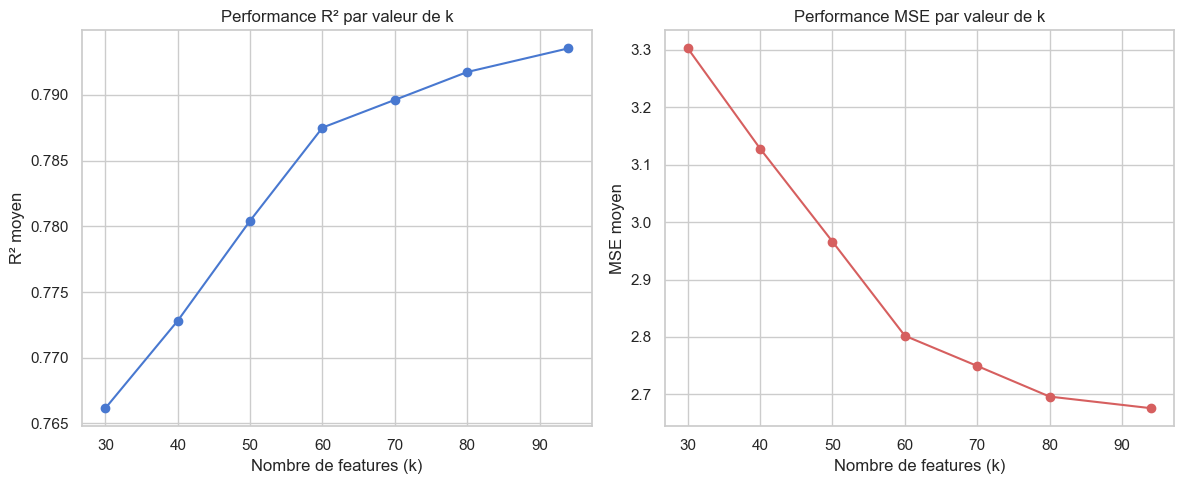

In [52]:
from sklearn.feature_selection import SelectKBest, f_regression
# Préparation des données
feature_names = X_train.columns.tolist() if hasattr(X_train, 'columns') else [f'feature_{i}' for i in range(X_train.shape[1])]
product_names = y_train.columns.tolist() if hasattr(y_train, 'columns') else [f'product_{i}' for i in range(y_train.shape[1])]

# Liste des valeurs de k à tester
k_values = [30, 40, 50, 60, 70, 80, 94]

# Dictionnaires pour stocker les résultats
results_r2 = {k: [] for k in k_values}
results_mse = {k: [] for k in k_values}

for k in k_values:
    print(f"\n{'='*50}\nEvaluation avec k={k}\n{'='*50}")
    
    for i, product in enumerate(product_names):
        # Sélection des features
        selector = SelectKBest(f_regression, k=min(k, len(feature_names)))
        y_train_product = y_train.iloc[:, i] if hasattr(y_train, 'iloc') else y_train[:, i]
        selector.fit(X_train, y_train_product)
        
        # Création des sous-ensembles
        selected_mask = selector.get_support()
        selected_features = [feature_names[j] for j in range(len(feature_names)) if selected_mask[j]]
        
        if hasattr(X_train, 'loc'):
            # Cas DataFrame pandas
            X_train_selected = X_train.loc[:, selected_features]
            X_test_selected = X_test.loc[:, selected_features]
        else:
            # Cas numpy array
            selected_indices = [j for j in range(len(feature_names)) if selected_mask[j]]
            X_train_selected = X_train[:, selected_indices]
            X_test_selected = X_test[:, selected_indices]
        
        # Entraînement et évaluation
        model = LinearRegression()
        model.fit(X_train_selected, y_train_product)
        y_pred = model.predict(X_test_selected)
        
        y_test_product = y_test.iloc[:, i] if hasattr(y_test, 'iloc') else y_test[:, i]
        results_r2[k].append(r2_score(y_test_product, y_pred))
        results_mse[k].append(mean_squared_error(y_test_product, y_pred))
    
    # Affichage des résultats pour ce k
    print(f"k={k} | R² moyen: {np.mean(results_r2[k]):.4f} | MSE moyen: {np.mean(results_mse[k]):.4f}")

# Affichage comparatif final
print("\n\nRésultats comparatifs:")
print("k\tR² moyen\tMSE moyen\tAmélioration R² vs k=94\tAmélioration MSE vs k=93")
for k in k_values[:-1]:  # On compare avec k=94 (dernier élément)
    r2 = np.mean(results_r2[k])
    mse = np.mean(results_mse[k])
    r2_diff = r2 - np.mean(results_r2[94])
    mse_diff = np.mean(results_mse[94]) - mse
    print(f"{k}\t{r2:.4f}\t\t{mse:.4f}\t\t{r2_diff:+.4f}\t\t\t{mse_diff:+.4f}")

# Visualisation graphique (optionnelle)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, [np.mean(results_r2[k]) for k in k_values], 'o-')
plt.xlabel('Nombre de features (k)')
plt.ylabel('R² moyen')
plt.title('Performance R² par valeur de k')

plt.subplot(1, 2, 2)
plt.plot(k_values, [np.mean(results_mse[k]) for k in k_values], 'o-r')
plt.xlabel('Nombre de features (k)')
plt.ylabel('MSE moyen')
plt.title('Performance MSE par valeur de k')

plt.tight_layout()
plt.show()

* **Toutes les features sont informatives : les transformations interactives ont créé des features pertinentes.**
* **Interdépendance complexe : Les variables interagissent de façon complexe pour prédire les ventes.**

>## **Option 7 :Regularisation (Lasso/Ridge/Elastic Net)**

> ## **Ridge Regression (L2)**
### utilisation de GridSearchCV pour trouver le meilleur alpha


In [262]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
#cv=5 ou cv=10 sont des choix standards

#cv=5 : Rapide et adapté aux jeux de données moyens/grands.

#cv=10 : Plus précis mais plus lent (idéal pour les petits datasets).

# Ridge
ridge = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}  
grid_ridge = GridSearchCV(ridge, params_ridge, cv=5).fit(X_train, y_train)
print("Meilleur alpha (Ridge):", grid_ridge.best_params_)

Meilleur alpha (Ridge): {'alpha': 0.1}


In [ ]:

# Modèle Ridge avec alpha optimal
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(X_train, y_train) 

In [264]:
y_pred_ridge = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)

print(f"R² (Ridge): {r2:.3f}")
print(f"MSE (Ridge): {mse:.3f}")

R² (Ridge): 0.708
MSE (Ridge): 2.531


**Ridge Regression donne exactement les mêmes performances que le modèle de régression linéaire classique 
signifie:**
* **pas de surapprentissage dans le modèle initial**
* **Pas ou peu de multicolinéarité nuisible**

> ## **Lasso Regression (L1)**
### utilisation de GridSearchCV pour trouver le meilleur alpha


In [267]:

# Pipeline =Régression Lass

pipeline = Pipeline([
    
    ('lasso', Lasso(max_iter=10000))# max_iter augmenté pour assurer la convergence  
])


params_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}


grid_lasso = GridSearchCV(pipeline, params_lasso, cv=5)
grid_lasso.fit(X_train, y_train)

print("✅ Meilleur alpha (Lasso):", grid_lasso.best_params_)

✅ Meilleur alpha (Lasso): {'lasso__alpha': 0.001}


In [268]:
lasso_model = Lasso(alpha=0.001, max_iter=10000)  
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"R² (Lasso): {r2_lasso:.3f}")
print(f"MSE (Lasso): {mse_lasso:.3f}")

R² (Lasso): 0.706
MSE (Lasso): 2.544


> ## **Elastic Net (Mixte L1 + L2)**
### utilisation de GridSearchCV pour trouver les meuilleurs paramètres 


In [270]:

# Elastic Net
elastic = ElasticNet(max_iter=10000)
params_elastic = {'alpha': [0.001, 0.01, 0.1] # Plage proche de Lasso (0.001) et Ridge (0.1)
                  ,'l1_ratio': [0.1, 0.5, 0.9]}  # l1_ratio = mix L1/L2 Plus de poids sur L1 (proche Lasso) ou L2 (proche Ridge)
grid_elastic = GridSearchCV(elastic, params_elastic, cv=5).fit(X_train, y_train)
print("Meilleurs paramètres (Elastic Net):", grid_elastic.best_params_)


Meilleurs paramètres (Elastic Net): {'alpha': 0.001, 'l1_ratio': 0.9}


In [271]:

# Modèle final avec les paramètres optimaux
final_model = ElasticNet(alpha=0.001, l1_ratio=0.9, max_iter=10000)
final_model.fit(X_train, y_train)
y_pred_elasticnet = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred_elasticnet)
mse = mean_squared_error(y_test, y_pred_elasticnet)

print(f"R² (Elastic Net final): {r2:.3f}")
print(f"MSE (Elastic Net final): {mse:.3f}")

R² (Elastic Net final): 0.706
MSE (Elastic Net final): 2.547


### **→ Regularisation (Lasso/Ridge/Elastic Net) moins performants que le modèle initial**

>## **Option 8 :Correction post-modèle ( post-processing rule-based adjustment)**

In [ ]:


# Liste des pourcentages à tester (en ordre croissant pour une meilleure visualisation)
pourcentages = [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 
                0.04, 0.045, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

# Extraire les vraies valeurs et prédictions pour le produit ciblé
y_test_urgence = y_test['équipements d urgence'].values
y_pred_urgence = y_pred.copy()  # Faire une copie pour éviter de modifier l'original

# Valeurs de référence (sans ajustement)
r2_base = r2_score(y_test_urgence, y_pred_urgence)
mse_base = mean_squared_error(y_test_urgence, y_pred_urgence)
mae_base = mean_absolute_error(y_test_urgence, y_pred_urgence)

# Ajouter les métriques de base comme référence
results.append({
    'augmentation (%)': 0, 
    'R²': r2_base, 
    'MSE': mse_base
  
})

# Tester chaque pourcentage d'augmentation
for pct in pourcentages:
    # Appliquer l'ajustement
    y_pred_adj = y_pred_urgence * (1 + pct)
    
    # Calculer les métriques
    r2 = r2_score(y_test_urgence, y_pred_adj)
    mse = mean_squared_error(y_test_urgence, y_pred_adj)
    mae = mean_absolute_error(y_test_urgence, y_pred_adj)
    
    
    # Ajouter les résultats
    results.append({
        'augmentation (%)': pct * 100, 
        'R²': r2, 
        'MSE': mse
        
    })

# Créer un DataFrame avec les résultats
df_results = pd.DataFrame(results)

# Afficher le tableau des résultats
print("Résultats des ajustements :")
pd.set_option('display.max_rows', None)  # Afficher toutes les lignes
pd.set_option('display.float_format', '{:.4f}'.format)  # Format des nombres décimaux
print(df_results)



# Visualisation des résultats
plt.figure(figsize=(14, 10))

# Graphique de R²
plt.subplot(2, 1, 1)
plt.plot(df_results['augmentation (%)'], df_results['R²'], marker='o', linestyle='-', color='blue')
plt.axhline(y=r2_base, color='red', linestyle='--', label=f'R² de base ({r2_base:.4f})')
plt.xlabel('Pourcentage d\'augmentation (%)')
plt.ylabel('R²')
plt.title('Impact de l\'ajustement sur le R²')
plt.grid(True)
plt.legend()

# Graphique de MSE
plt.subplot(2, 1, 2)
plt.plot(df_results['augmentation (%)'], df_results['MSE'], marker='o', linestyle='-', color='green')
plt.axhline(y=mse_base, color='red', linestyle='--', label=f'MSE de base ({mse_base:.4f})')
plt.xlabel('Pourcentage d\'augmentation (%)')
plt.ylabel('MSE')
plt.title('Impact de l\'ajustement sur le MSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()





### **Les résultats montrent que plus on augmente les prédictions du produit "équipements d’urgence", plus**
* **le R² devient négatif et décroît (ce qui signifie que le modèle devient de moins en moins bon),**

* **le MSE augmente, donc les erreurs sont plus grandes.**

  > même pour les soins hydratants 

# Analyse en Composantes Principales (PCA) : réduction de dimensionnalité

In [74]:
#Création du modèle PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Conserve 95% de la variance
X_pca = pca.fit_transform(X_prepared2)

* **0.99 : Trop conservateur (garde presque toutes les composantes).**

* **0.90 : Réduction plus aggressive (risque de perte d'information utile).**

* **Seuil de 95% : Choix classique pour équilibrer :**

    * Simplicité (moins de dimensions).

    * Précision (perte d'information minimale).

In [67]:
#Analyse des résultats:
print("Variance expliquée par composante :", pca.explained_variance_ratio_)
print("Nombre de composantes sélectionnées :", pca.n_components_)

Variance expliquée par composante : [0.20973895 0.14687146 0.1120869  0.07013569 0.06443777 0.05444603
 0.03127848 0.02780253 0.02612907 0.02032566 0.01965823 0.01768408
 0.01667828 0.01625621 0.01601492 0.01410357 0.01341794 0.01302103
 0.01135973 0.01059541 0.00943329 0.00907694 0.00856906 0.00850113
 0.00751583]
Nombre de composantes sélectionnées : 25


**→ PCA a automatiquement sélectionné 25 composantes pour conserver 95% de la variance totale cumulée.**
**on passe de 94 variables initiales à 25 composantes (réduction de ~73%), tout en conservant 95% de l'information.**

In [68]:

variance_cumulee = np.cumsum([0.20973895 ,0.14687146, 0.1120869,  0.07013569, 0.06443777, 0.05444603,
 0.03127848 ,0.02780253, 0.02612907, 0.02032566 ,0.01965823, 0.01768408,
 0.01667828 ,0.01625621, 0.01601492, 0.01410357, 0.01341794, 0.01302103,
 0.01135973, 0.01059541, 0.00943329, 0.00907694, 0.00856906 ,0.00850113,
 0.00751583])
print(variance_cumulee)

[0.20973895 0.35661041 0.46869731 0.538833   0.60327077 0.6577168
 0.68899528 0.71679781 0.74292688 0.76325254 0.78291077 0.80059485
 0.81727313 0.83352934 0.84954426 0.86364783 0.87706577 0.8900868
 0.90144653 0.91204194 0.92147523 0.93055217 0.93912123 0.94762236
 0.95513819]


In [75]:
#Entraînement du modèle sur les composantes
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

In [76]:
y_test_pred_pca= model_pca.predict(X_test_pca)
r2 = r2_score(y_test_pca, y_test_pred_pca)
mse = mean_squared_error(y_test_pca, y_test_pred_pca)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R²: 0.6325
MSE: 3.7329


## **Comparaison avec le Modèle Initial**
* **Modèle initial (sans PCA) : R² = 0.79, MSE = 2.67.**

* **Avec PCA : R² = 0.71, MSE = 3.73.**

> **PCA a réduit la performance (baisse de ~11% en R²). Cela suggère que :<br>- Les 25 composantes ne capturent pas assez d'information.<br>- Les variables d'interaction manuelles (94 features) étaient plus informatives que les composantes PCA.**

## **Justification de choix du  PCA**
* **Simplicité et efficacité :**

    * **PCA est une méthode non supervisée qui ne nécessite pas d’étiquettes.**
    
    * **Calcul rapide même sur 94 variables → idéal pour une première approche.**
 
* **Comparaison avec alternatives :**

    * **t-SNE/UMAP : Déforment les distances, inadaptés à la régression.**

    * **LDA : Nécessite des classes, pas votre cas.**

    * **Autoencodeurs : Surkill pour 94 variables (complexité inutile).**

# **Cross Validation :**

| Méthode             | Quand l’utiliser ?                           | Décision |
| ------------------- | -------------------------------------------- |-----------|
| K-Fold              | Par défaut, données homogènes                | **OUI**   |
| Stratified K-Fold   | Classification avec classes déséquilibrées   | **NON PAS LE CAS** |
| Leave-One-Out (LOO) | Très petit dataset                           | **NON (43K,94)** |
| Group K-Fold        | Données regroupées (ex : clients, patients…) | **NON PAS LE CAS** |
| TimeSeriesSplit     | Données temporelles                          | **NON PAS LE CAS** |
| Repeated K-Fold     | Plus grande robustesse des scores            | **PAS NECESSAIRE** |


> ## **K-Fold Cross-Validation**
> * **Divise les données en k parties égales.**
> * **À chaque itération, une partie est utilisée pour tester, les autres pour entraîner.**

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def evaluate_cv_model(x, y, num_cols, cv=5, scoring='r2'):
 

    # Évaluation par cross-validation
    scores = cross_val_score(lin_reg, x, y, cv=cv, scoring=scoring)

    # Affichage
    if scoring == 'r2':
        print(f"R² par fold : {np.round(scores, 4)}")
        print(f"Score R² moyen sur {cv} folds : {scores.mean():.4f}")
    elif scoring == 'neg_mean_squared_error':
        mse_scores = -scores
        print(f"MSE par fold : {np.round(mse_scores, 4)}")
        print(f"MSE moyen sur {cv} folds : {mse_scores.mean():.4f}")
    else:
        print("Scoring non reconnu")


evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=2, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=3, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=4, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=5, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=6, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=7, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=8, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=9, scoring='r2')
evaluate_cv_model(X_train, y_train, num_cols=num_cols, cv=10, scoring='r2')




R² par fold : [0.7892 0.7914]
Score R² moyen sur 2 folds : 0.7903
R² par fold : [0.7891 0.7907 0.7919]
Score R² moyen sur 3 folds : 0.7906
R² par fold : [0.7872 0.7921 0.7929 0.7906]
Score R² moyen sur 4 folds : 0.7907
R² par fold : [0.7878 0.7925 0.7892 0.7937 0.7903]
Score R² moyen sur 5 folds : 0.7907
R² par fold : [0.7876 0.7909 0.7903 0.7914 0.793  0.7909]
Score R² moyen sur 6 folds : 0.7907
R² par fold : [0.7873 0.7874 0.7954 0.789  0.7945 0.7875 0.7933]
Score R² moyen sur 7 folds : 0.7906
R² par fold : [0.7863 0.7883 0.7942 0.79   0.791  0.7948 0.7891 0.7923]
Score R² moyen sur 8 folds : 0.7907
R² par fold : [0.7853 0.7904 0.7923 0.7929 0.788  0.7915 0.7952 0.7904 0.7905]
Score R² moyen sur 9 folds : 0.7907
R² par fold : [0.7853 0.7903 0.7896 0.7949 0.7877 0.7908 0.795  0.7922 0.7908 0.79  ]
Score R² moyen sur 10 folds : 0.7906


## **→ Stabilité exceptionnelle :**

* **Les scores R² sont remarquablement cohérents pour toutes les valeurs de k (de 2 à 10 folds)**

* **La variation entre les folds est minime (écart-type < 0.003)**

* **Le score moyen reste extrêmement stable autour de 0.7098**

>**le modèle montre une grande robustesse aux variations d'échantillonnage**
>**La performance est très reproductible quel que soit le découpage des données**
>**Aucun signe d'overfitting ou de problèmes de stabilité**

# **CONCLUSION**

## **Les étapes réalisées incluent :**

* **1. Construction d’un modèle de régression linéaire multivariée.**

* **2. Évaluation initiale : R² = 0.74 , MSE = 3.58.**

* **3. Analyse de multicolinéarité (VIF) et suppression des variables redondantes → pas d’effet notable.**

* **4. Vérification de l’hypothèse de linéarité par l’étude des résidus.**

* **5. Construction de variables d’interaction manuelles (94 features) → amélioration significative : R² = 0.79, MSE = 2.67.**

* **6. Transformations polynomiales et logarithmiques → dégradation des performances.**

* **7. Vérification de l'absence d’overfitting : modèle stable sur test/train.**

* **8. Sélection de variables (SelectKBest) → performances diminuent si k < 94 → toutes les variables semblent utiles.**

* **9. Regularisation (Lasso/Ridge/Elastic Net) →  moins performants que le modèle initial**

* **10. Correction post-modèle ( post-processing rule-based adjustment) pour les équipement d'urgence & soins hydratants → le modèle devient de moins en moins bon**

* **11. Réduction de dimentionnalité avec PCA**
* **12. Validation croisée avec K-Fold en faisant varier la valeur de K de 2 à 10.**



  